### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1- Análisis de facturación



In [2]:
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

datos_global = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

pd.options.display.float_format = '{:,.0f}'.format
ventas = datos_global.groupby('Tienda')['Precio'].sum()
ventas

,Precio
Tienda,
Tienda 1,"1,150,880,400"
Tienda 2,"1,116,343,500"
Tienda 3,"1,098,019,600"
Tienda 4,"1,038,375,700"


In [3]:
nombres_tiendas = ventas.index.tolist()
ventas_totales = ventas.values.tolist()

print("Nombres de tiendas:", nombres_tiendas)
print("Ventas totales:", ventas_totales)

Nombres de tiendas: ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
Ventas totales: [1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]


##Gafico de la facturación por tienda

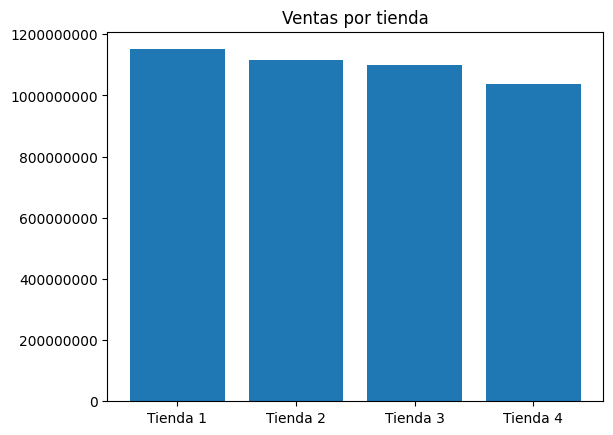

In [4]:
from matplotlib import pyplot as plt

plt.bar(x= nombres_tiendas, height=ventas_totales)
plt.title('Ventas por tienda')
plt.ticklabel_format(style='plain', axis='y') # Evitar notación cientifica
plt.show()

# 2- Ventas por categoría

In [5]:
pd.options.display.float_format = '{:,.0f}'.format
ventas_por_categorias = datos_global[['Tienda', 'Categoría del Producto', 'Precio']].copy()
ventas_por_categorias['Categoria y tiendas'] = ventas_por_categorias['Categoría del Producto'] + '-' + ventas_por_categorias['Tienda']
ventas_por_categorias = ventas_por_categorias.groupby(['Categoria y tiendas'])['Precio'].sum()
#ventas_por_categorias.sort_index(level='Categoria y tiendas')
ventas_por_categorias.sort_values(ascending=False)

,Precio
Categoria y tiendas,
Electrónicos-Tienda 1,"429,493,500"
Electrónicos-Tienda 2,"410,831,100"
Electrónicos-Tienda 3,"410,775,800"
Electrónicos-Tienda 4,"409,476,100"
Electrodomésticos-Tienda 1,"363,685,200"
Electrodomésticos-Tienda 2,"348,567,800"
Electrodomésticos-Tienda 3,"329,237,900"
Electrodomésticos-Tienda 4,"283,260,200"
Muebles-Tienda 3,"201,072,100"


In [6]:
nombres_categorias = ventas_por_categorias.index.tolist()
ventas_categorias = ventas_por_categorias.values.tolist()

print("Nombres de categoria:", nombres_categorias)
print("Ventas totales:", ventas_categorias)

Nombres de categoria: ['Artículos para el hogar-Tienda 1', 'Artículos para el hogar-Tienda 2', 'Artículos para el hogar-Tienda 3', 'Artículos para el hogar-Tienda 4', 'Deportes y diversión-Tienda 1', 'Deportes y diversión-Tienda 2', 'Deportes y diversión-Tienda 3', 'Deportes y diversión-Tienda 4', 'Electrodomésticos-Tienda 1', 'Electrodomésticos-Tienda 2', 'Electrodomésticos-Tienda 3', 'Electrodomésticos-Tienda 4', 'Electrónicos-Tienda 1', 'Electrónicos-Tienda 2', 'Electrónicos-Tienda 3', 'Electrónicos-Tienda 4', 'Instrumentos musicales-Tienda 1', 'Instrumentos musicales-Tienda 2', 'Instrumentos musicales-Tienda 3', 'Instrumentos musicales-Tienda 4', 'Juguetes-Tienda 1', 'Juguetes-Tienda 2', 'Juguetes-Tienda 3', 'Juguetes-Tienda 4', 'Libros-Tienda 1', 'Libros-Tienda 2', 'Libros-Tienda 3', 'Libros-Tienda 4', 'Muebles-Tienda 1', 'Muebles-Tienda 2', 'Muebles-Tienda 3', 'Muebles-Tienda 4']
Ventas totales: [12698400.0, 14746900.0, 15060000.0, 15074500.0, 39290000.0, 34744500.0, 35593100.0, 

##Grafico de las categorias por tienda

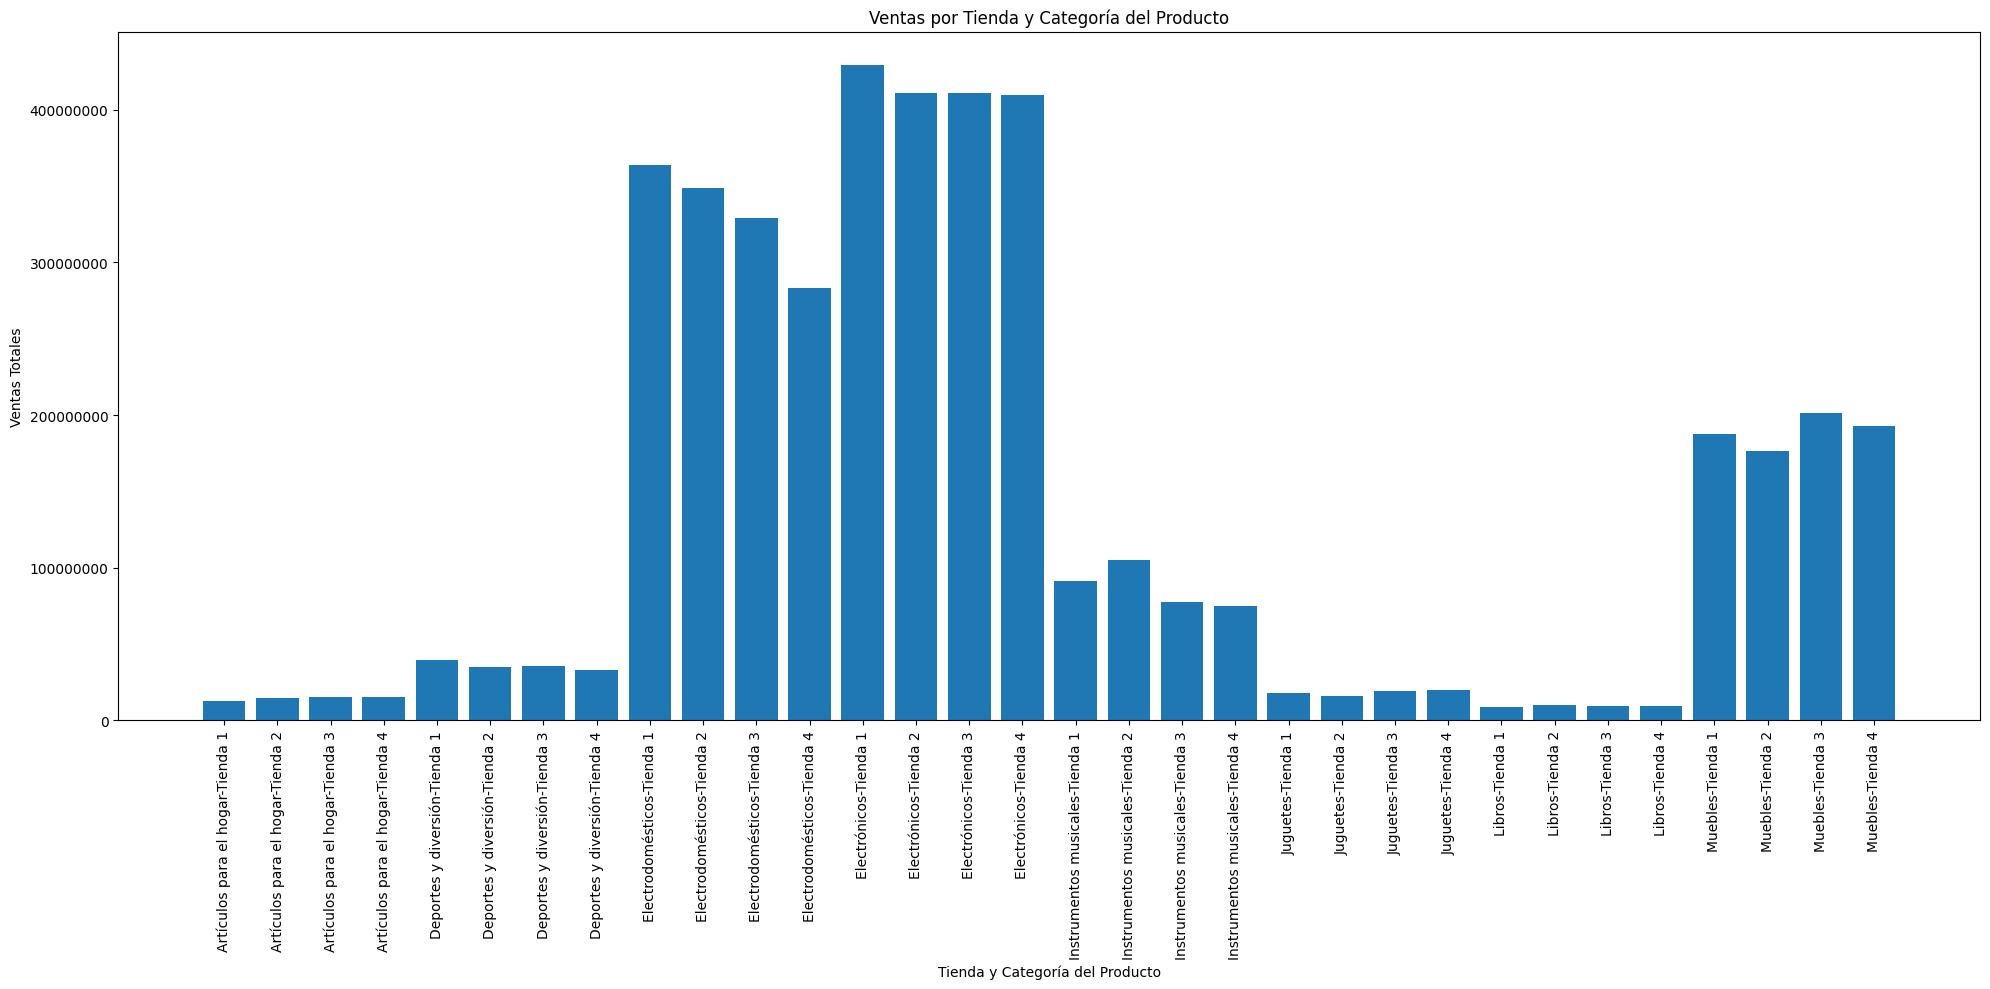

In [7]:

plt.figure(figsize=(20, 10)) # Aumentar el tamaño de la figura para mejorar la legibilidad
plt.bar(x=nombres_categorias, height=ventas_categorias)
plt.xlabel('Tienda y Categoría del Producto')
plt.ylabel('Ventas Totales')
plt.title('Ventas por Tienda y Categoría del Producto')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y') # Evitar notación cientifica
plt.tight_layout() # Ajustar el diseño para que las etiquetas no se corten
plt.show()

# 3- Calificación promedio de la tienda


In [8]:
pd.options.display.float_format = '{:.4f}'.format
calificaciones = datos_global[['Tienda', 'Calificación']].copy()
calificaciones = calificaciones.groupby(['Tienda'])['Calificación'].mean()
calificaciones

,Calificación
Tienda,
Tienda 1,3.9767
Tienda 2,4.0373
Tienda 3,4.0483
Tienda 4,3.9958


In [9]:
calificacion = calificaciones.values.tolist()

print("Nombres de tiendas:", nombres_tiendas)
print("Ventas totales:", calificacion)

Nombres de tiendas: ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
Ventas totales: [3.976685036032217, 4.037303942348453, 4.048325561678677, 3.9957591178965224]


##Grafico de la calificación promedio por tienda

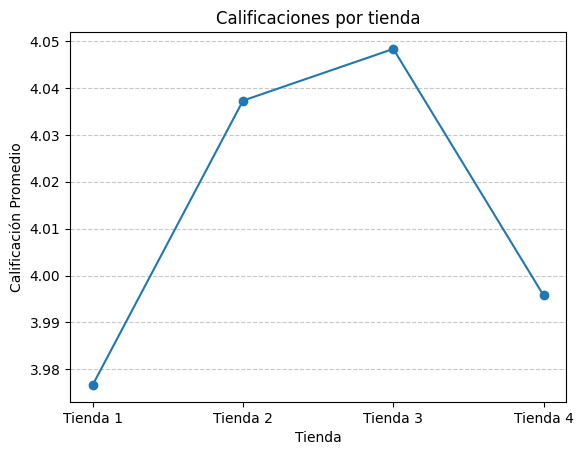

In [10]:
plt.plot(nombres_tiendas, calificacion, marker='o', linestyle='-') # Usar un gráfico de líneas con marcadores
plt.title('Calificaciones por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una cuadrícula para facilitar la lectura
plt.show()

# 4- Productos más y menos vendidos

In [11]:
ranking_productos = datos_global[['Tienda', 'Producto']].copy()

# Agrupar por producto y hacer value_counts para obtener los valores (conteos)
conteo = ranking_productos.groupby('Producto').value_counts().reset_index(name='Valores')

#Crear la columna combinada 'Producto y Tienda'
conteo['Producto y Tienda'] = conteo['Producto'] + '-' + conteo['Tienda']

# Seleccionar solo las columnas que necesito
ranking_productos = conteo[['Producto y Tienda', 'Valores']]

# Ordenar por valores de mayor a menor (opcional)
ranking_productos = ranking_productos.sort_values('Valores', ascending=False)

# Resetear el índice
ranking_productos = ranking_productos.reset_index(drop=True)
producto_mas_vendido = ranking_productos.head(10)
producto_menos_vendido = ranking_productos.tail(10).sort_values('Valores', ascending=True)

# Mostrar el resultado
print(ranking_productos)

                      Producto y Tienda  Valores
0    Iniciando en programación-Tienda 2       65
1                     Cama box-Tienda 4       62
2                   Microondas-Tienda 2       62
3                      Batería-Tienda 2       61
4                TV LED UHD 4K-Tienda 1       60
..                                  ...      ...
199                  Impresora-Tienda 2       34
200               Celular ABXY-Tienda 1       33
201  Auriculares con micrófono-Tienda 1       33
202         Guitarra eléctrica-Tienda 4       33
203              Juego de mesa-Tienda 2       32

[204 rows x 2 columns]


In [12]:
lista_mas_vendidos_p = producto_mas_vendido['Producto y Tienda'].tolist()
lista_mas_vendidos_v = producto_mas_vendido['Valores'].tolist()

print("Productos más vendidos:", lista_mas_vendidos_p)
print("Cantidades totales:", lista_mas_vendidos_v)

Productos más vendidos: ['Iniciando en programación-Tienda 2', 'Cama box-Tienda 4', 'Microondas-Tienda 2', 'Batería-Tienda 2', 'TV LED UHD 4K-Tienda 1', 'Microondas-Tienda 1', 'Armario-Tienda 1', 'Cubertería-Tienda 4', 'Secadora de ropa-Tienda 1', 'Guitarra acústica-Tienda 2']
Cantidades totales: [65, 62, 62, 61, 60, 60, 60, 59, 58, 58]


##Grafico producto más vendido

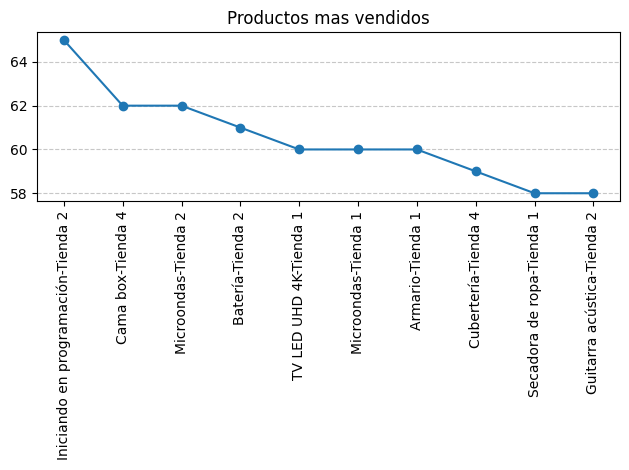

In [13]:
plt.plot(lista_mas_vendidos_p, lista_mas_vendidos_v, marker='o', linestyle='-')
plt.title('Productos mas vendidos')
plt.xticks(rotation=90)
plt.tight_layout() # Ajustar el diseño para que las etiquetas no se corten
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una cuadrícula para facilitar la lectura
plt.show()

In [14]:
lista_menos_vendidos_p = producto_menos_vendido['Producto y Tienda'].tolist()
lista_menos_vendidos_v = producto_menos_vendido['Valores'].tolist()

print("Productos menos vendidos:", lista_menos_vendidos_p)
print("Cantidades totales:", lista_menos_vendidos_v)

Productos menos vendidos: ['Juego de mesa-Tienda 2', 'Celular ABXY-Tienda 1', 'Guitarra eléctrica-Tienda 4', 'Auriculares con micrófono-Tienda 1', 'Armario-Tienda 4', 'Impresora-Tienda 2', 'Mesa de comedor-Tienda 2', 'Sillón-Tienda 2', 'Bloques de construcción-Tienda 3', 'Olla de presión-Tienda 1']
Cantidades totales: [32, 33, 33, 33, 34, 34, 34, 35, 35, 35]


##Grafico producto menos vendido

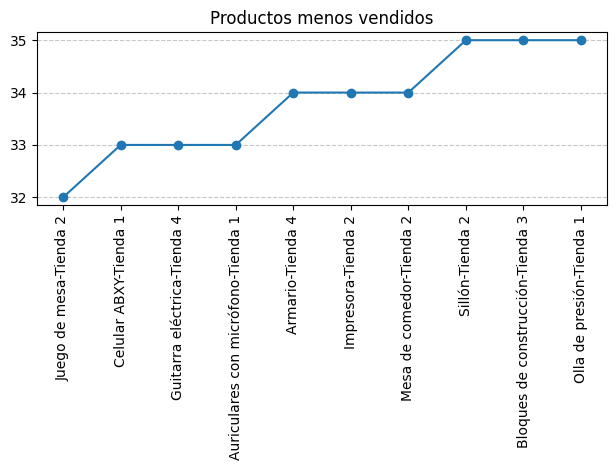

In [15]:
plt.plot(lista_menos_vendidos_p, lista_menos_vendidos_v, marker='o', linestyle='-')
plt.title('Productos menos vendidos')
plt.xticks(rotation=90)
plt.tight_layout() # Ajustar el diseño para que las etiquetas no se corten
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una cuadrícula para facilitar la lectura
plt.show()

# 5- Envío promedio por tienda

In [19]:
pd.options.display.float_format = '{:,.2f}'.format
envio_promedio = datos_global[['Tienda', 'Costo de envío']].copy()
envio_promedio = envio_promedio.groupby(['Tienda'])['Costo de envío'].mean()
envio_promedio

,Costo de envío
Tienda,
Tienda 1,"26,018.61"
Tienda 2,"25,216.24"
Tienda 3,"24,805.68"
Tienda 4,"23,459.46"


#6- Analisis extra para determinar que Tienda debe cerrar

In [17]:
pd.options.display.float_format = '{:,.0f}'.format
fecha = datos_global[['Fecha de Compra' , 'Tienda' , 'Precio']].copy()

# Convertir la columna fecha a datetime
fecha['Fecha de Compra'] = pd.to_datetime(fecha['Fecha de Compra'], format='%d/%m/%Y')

# Extraer el año en una nueva columna
fecha['año'] = fecha['Fecha de Compra'].dt.year

# Agrupar por año y tienda y sumar la columna 'Precio'
agrupado = fecha.groupby(['año' , 'Tienda'])['Precio'].sum()
print(agrupado)

año   Tienda  
2020  Tienda 1   368,933,200
      Tienda 2   320,466,600
      Tienda 3   321,707,500
      Tienda 4   330,847,700
2021  Tienda 1   362,120,800
      Tienda 2   351,215,500
      Tienda 3   362,954,400
      Tienda 4   347,823,600
2022  Tienda 1   316,565,600
      Tienda 2   358,226,500
      Tienda 3   350,438,300
      Tienda 4   302,221,500
2023  Tienda 1   103,260,800
      Tienda 2    86,434,900
      Tienda 3    62,919,400
      Tienda 4    57,482,900
Name: Precio, dtype: float64
